In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as stm
import statistics as stats
from itertools import combinations
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing, svm
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
%matplotlib inline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [2]:
#Reading Data.
house = pd.read_csv('wk3_kc_house_train_data.csv') 
house_test = pd.read_csv('wk3_kc_house_test_data.csv')

## Exploratory Data Analysis

##### 1. Understanding the data.

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [4]:
house_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [5]:
print(house.shape)
print(house_test.shape)

(9761, 21)
(2217, 21)


In [6]:
house.describe(include = "all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,...,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
unique,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140820T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.605288e+09,NaN,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,...,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,NaN,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,...,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,NaN,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,NaN,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,...,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,NaN,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,...,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000


In [7]:
house.nunique()

id               9720
date              357
price            2533
bedrooms           13
bathrooms          28
sqft_living       730
sqft_lot         5581
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        665
sqft_basement     251
yr_built          116
yr_renovated       65
zipcode            70
lat              4186
long              666
sqft_living15     588
sqft_lot15       5147
dtype: int64

#### 2. Cleaning the data.

In [8]:
#Checking duplicate rows.
house[house.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
#Checking null values.
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#New feature age is introduced. [yr_renovated - yr_built] 
age = []
for i in range(len(house['yr_renovated'])):
    if house['yr_renovated'][i] > 0:
        age.append(2015 - house['yr_renovated'][i])
    else:
        age.append(2015 - house['yr_built'][i])
house['age'] = age

age = []
for i in range(len(house_test['yr_renovated'])):
    if house_test['yr_renovated'][i] > 0:
        age.append(2015 - house_test['yr_renovated'][i])
    else:
        age.append(2015 - house_test['yr_built'][i])
house_test['age'] = age

In [11]:
#The columns which are not needed for analysis are dropped.
house = house.drop(columns=['id','date','lat','long','sqft_living15','sqft_lot15','yr_built','yr_renovated','sqft_above','sqft_basement'])
house_test = house_test.drop(columns=['id','date','lat','long','sqft_living15','sqft_lot15','yr_built','yr_renovated','sqft_above','sqft_basement'])

In [12]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,98136,50
1,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,98053,14
2,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,98115,73
3,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,98028,88
4,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,98074,38


In [13]:
house_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,98038,12
1,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,98107,115
2,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,98002,94
3,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,98117,86
4,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,98001,46
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,405000.0,4,2.50,1980,5020,2.0,0,0,3,7,98056,8
2213,388000.0,3,2.50,2198,6222,2.0,0,2,3,8,98198,5
2214,608500.0,4,3.50,2850,5577,2.0,0,0,3,8,98056,1
2215,230000.0,3,1.75,1140,1201,2.0,0,0,3,8,98108,1


In [14]:
house[house['bedrooms']==33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
7204,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,98103,68


In [15]:
#The extreme value in variable bedroom is removed as it seemed to be a data entry error.
house = house.drop(house[house['bedrooms']==33].index.values)

In [16]:
house.shape

(9760, 12)

#### 4. Realtionship Analysis

a. Univariate Analysis

In [17]:
#Standardising the data.
scaler = StandardScaler()
scaler.fit(house)
house_std_plot = scaler.transform(house)
house_std_plot = pd.DataFrame(columns = house.columns, data = house_std_plot)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

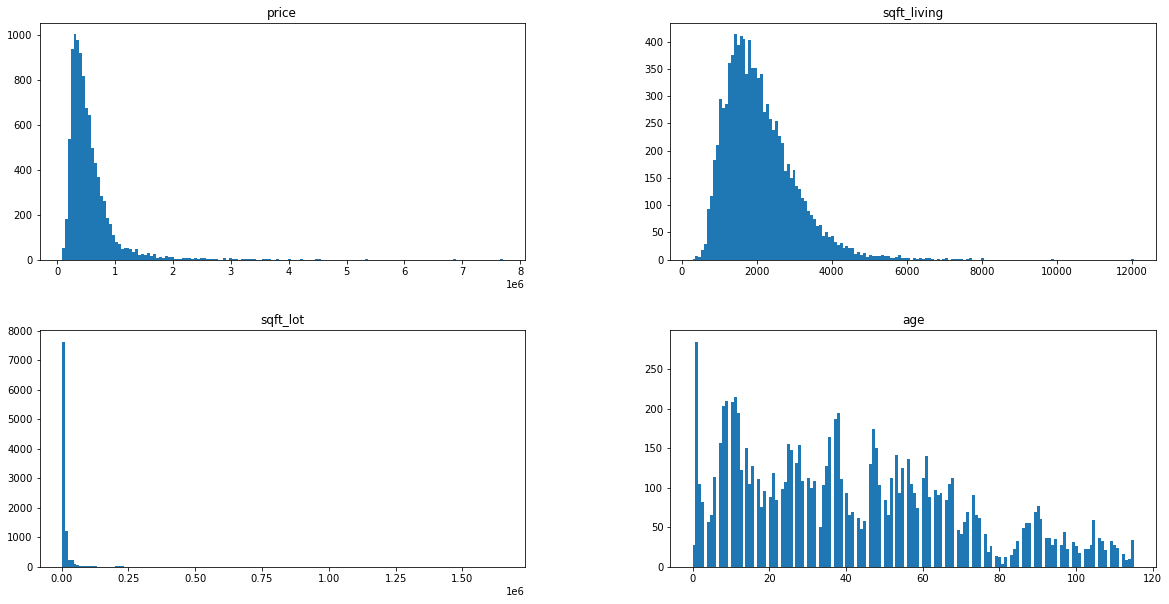

In [18]:
#Checking distribution of variables.
house.hist(column = ['price','sqft_living','sqft_lot','age']
           , figsize = (20,10), grid = False, bins = 150)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

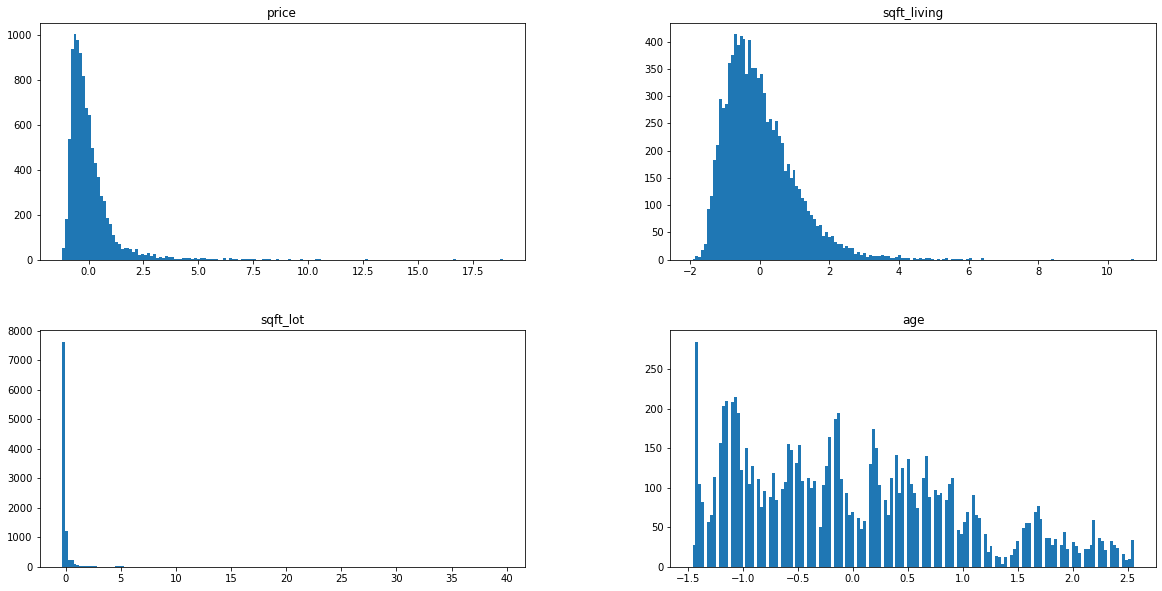

In [19]:
#Distributio of standardised data.
house_std_plot.hist(column = ['price','sqft_living','sqft_lot','age']
           , figsize = (20,10), grid = False, bins = 150)

<AxesSubplot:>

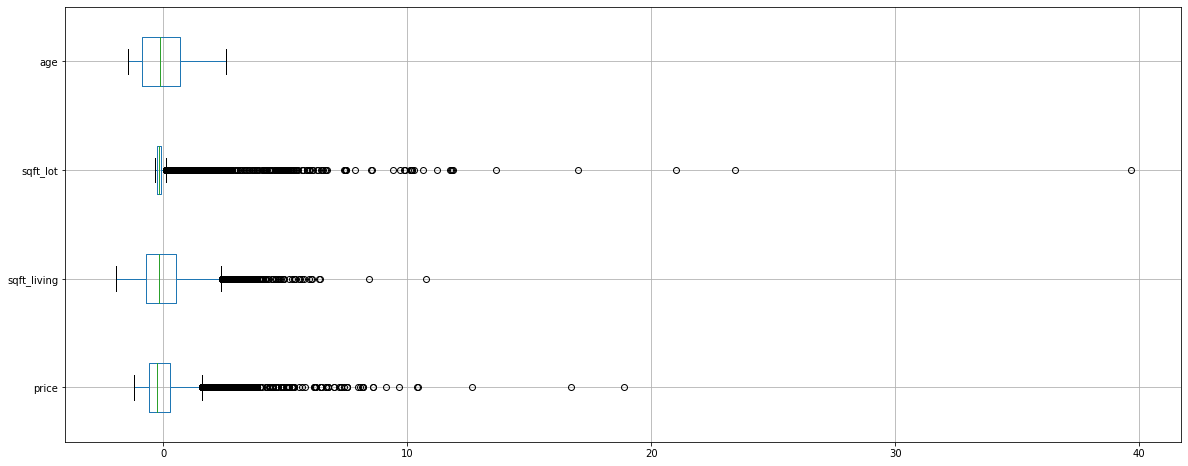

In [20]:
#box plot for chcking distribution.
house_std_plot.boxplot(column = ['price','sqft_living','sqft_lot','age']
              , figsize = (20,8), vert = 0)

<AxesSubplot:>

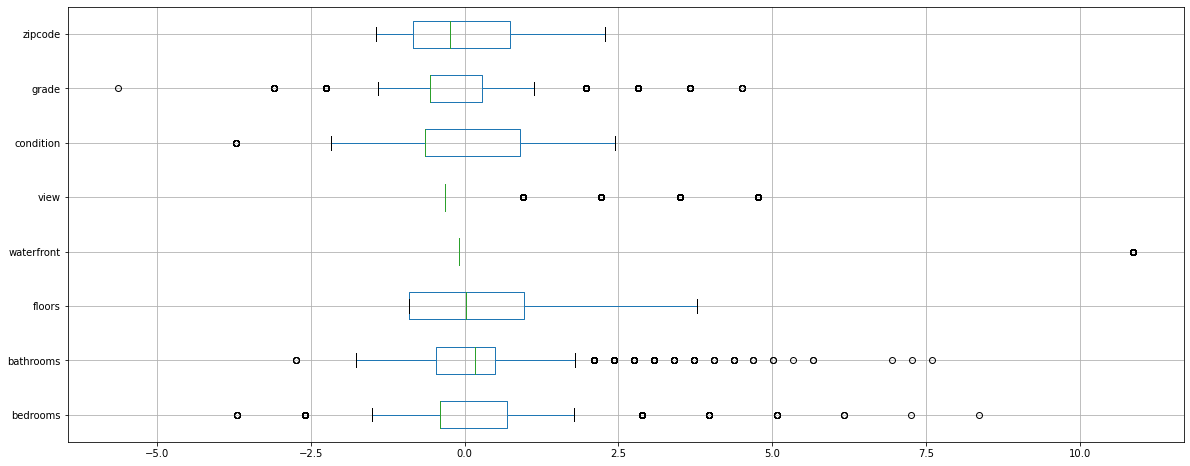

In [21]:
#box plots for standardised data.
house_std_plot.boxplot(column = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']
              , figsize = (20,8), vert = 0)

b. Bivariate Analysis

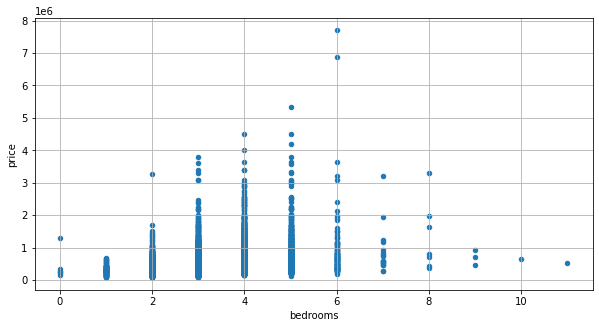

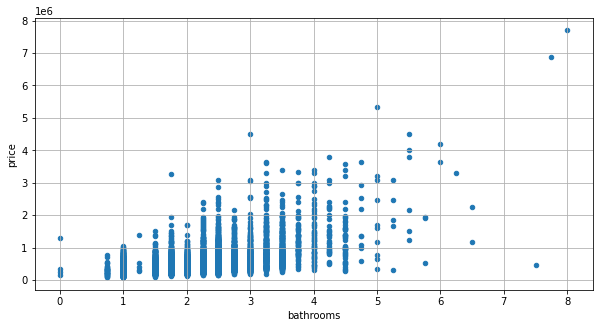

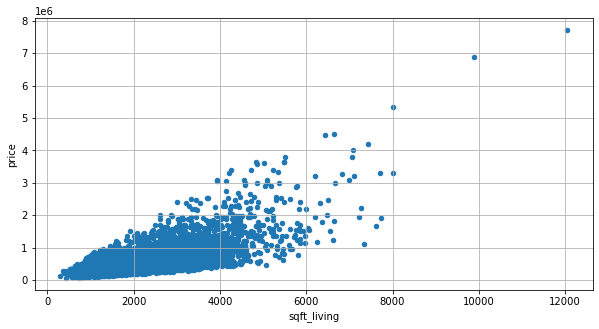

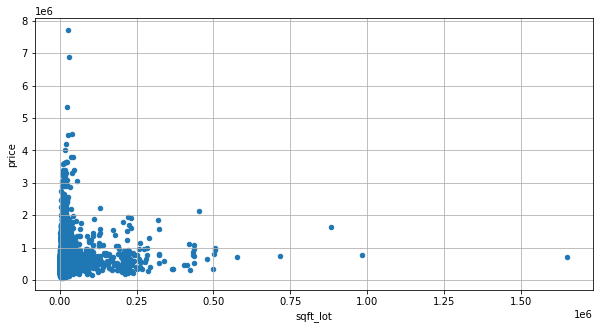

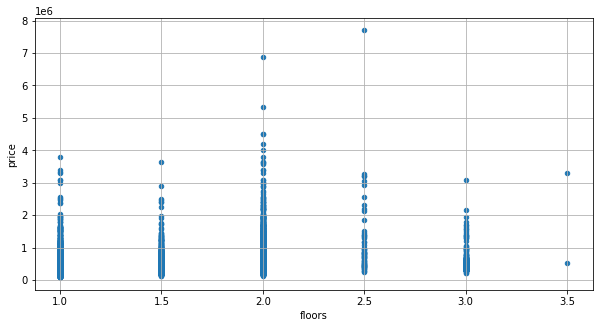

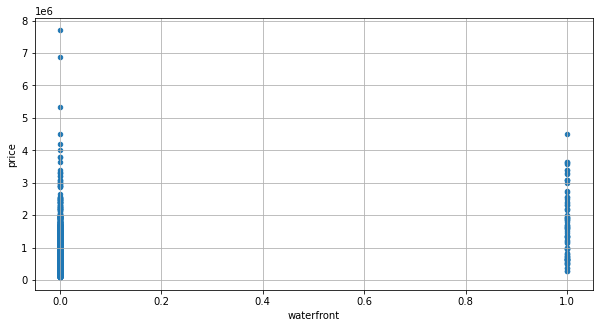

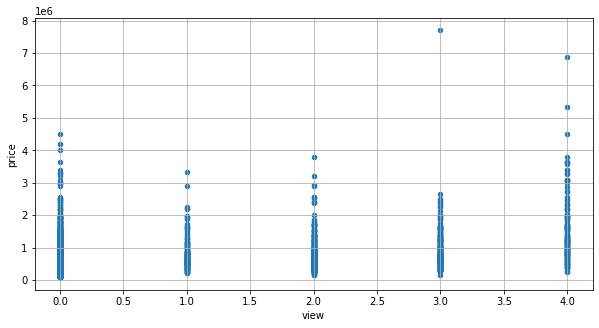

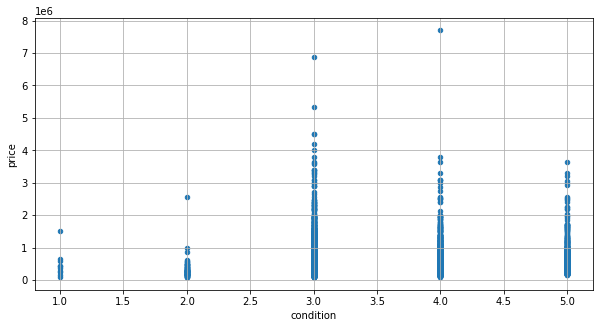

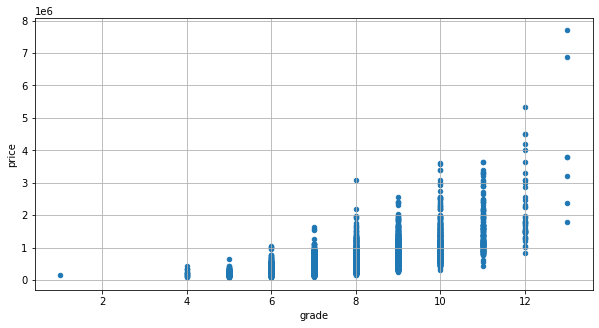

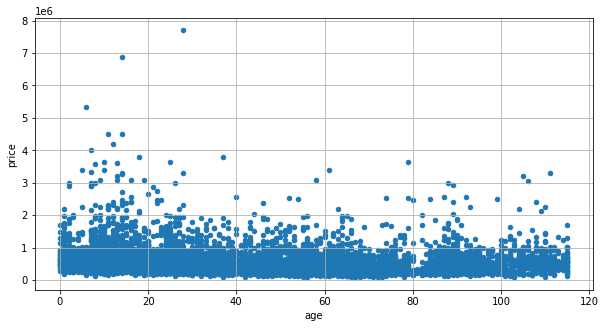

In [22]:
#Scatter plot between price and othe variables.
for i in house.columns:
    if i not in ['price','zipcode']:
        house.plot.scatter(x = i,y = 'price', figsize = (10,5), grid = True)

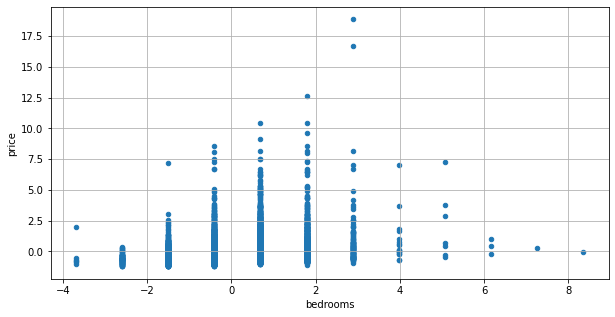

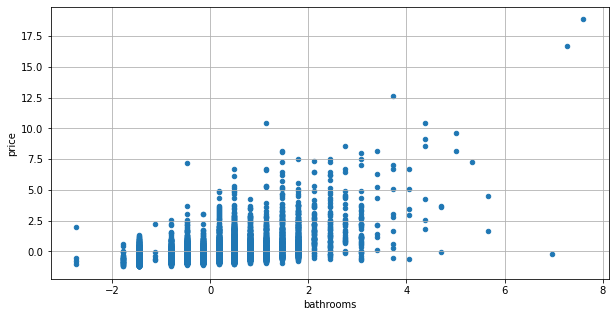

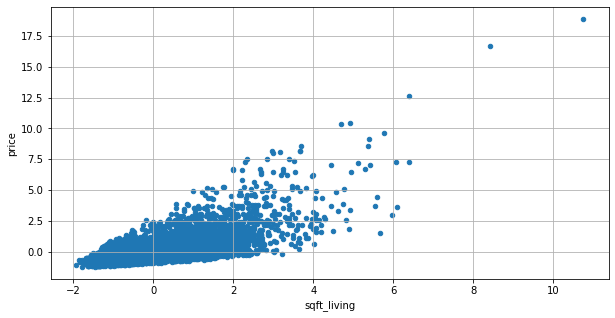

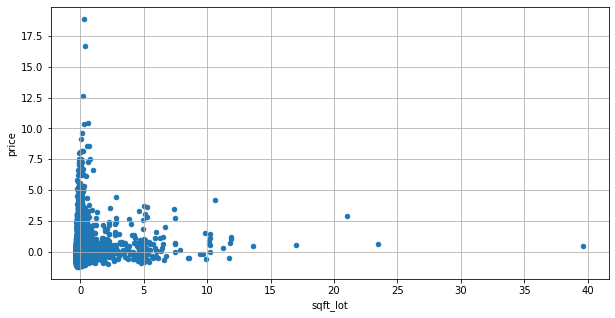

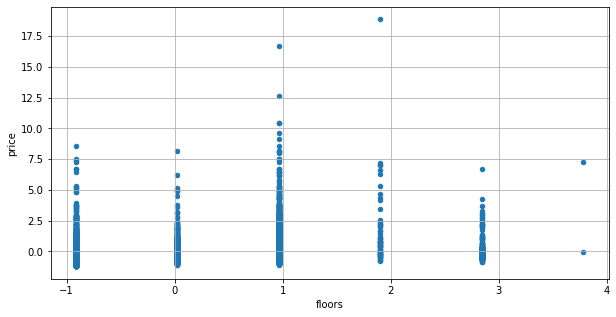

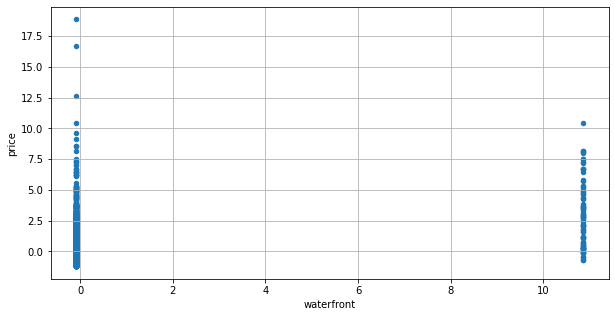

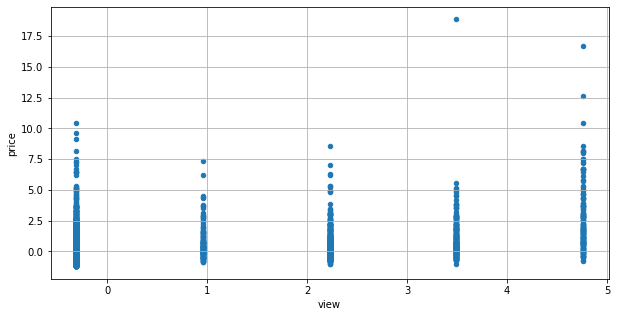

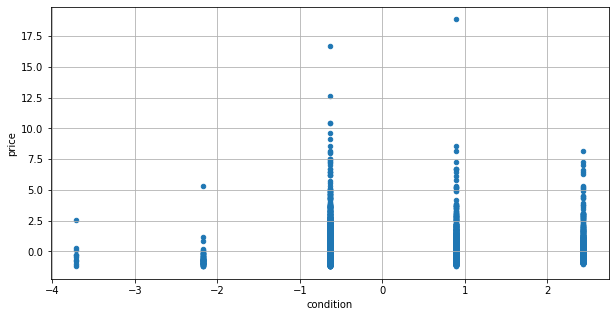

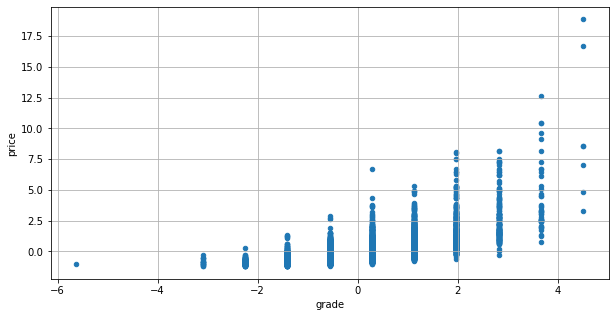

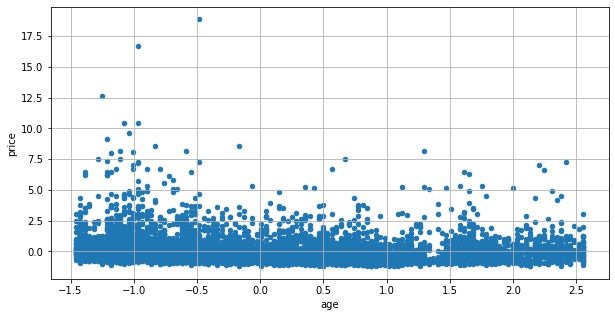

In [23]:
for i in house.columns:
    if i not in ['price','zipcode']:
        house_std_plot.plot.scatter(x = i,y = 'price', figsize = (10,5), grid = True)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

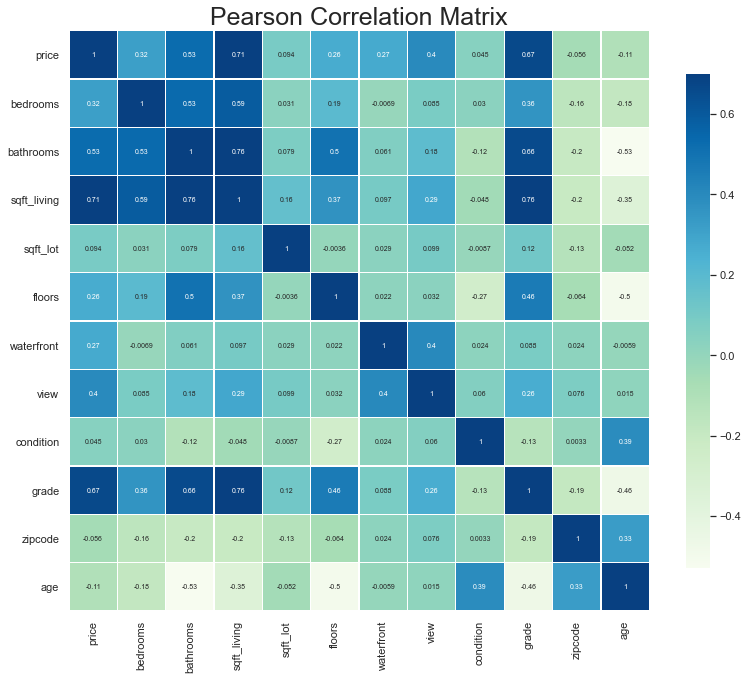

In [24]:
#Correlation matrix.
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(house.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [25]:
price_corr = house.corr()['price'].sort_values(ascending=False)
print(price_corr)

price          1.000000
sqft_living    0.705077
grade          0.665594
bathrooms      0.527552
view           0.399669
bedrooms       0.315777
waterfront     0.274981
floors         0.262990
sqft_lot       0.094149
condition      0.044682
zipcode       -0.055642
age           -0.105923
Name: price, dtype: float64


## Target and Predictors

A. Not Standardised Data

In [26]:
#Target and Predictor variables.
x = house[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
           'waterfront','view','condition','grade','zipcode','age']]
y = house[['price']]

x_test = house_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
           'waterfront','view','condition','grade','zipcode','age']]

y_test = house_test[['price']]

In [27]:
y_test

,price
0,323000.0
1,530000.0
2,189000.0
3,687500.0
4,240000.0
...,...
2212,405000.0
2213,388000.0
2214,608500.0
2215,230000.0


B. Standardised Data

In [28]:
#Splitting data into numerical and categorical data.
x_num = house[['sqft_living','sqft_lot','age']]
x_cat = house[['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']]
x_num_test = house_test[['sqft_living','sqft_lot','age']]
x_cat_test = house_test[['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']]

In [29]:
#Standardising the data.
scaler = StandardScaler()
scaler.fit(x_num)
x_num_std = scaler.transform(x_num)
x_num_std = pd.DataFrame(index=x_num.index.values, columns = x_num.columns, data = x_num_std)

In [30]:
scaler = StandardScaler()
scaler.fit(x_num_test)

x_num_std_test = scaler.transform(x_num_test)
x_num_std_test = pd.DataFrame(index=x_num_test.index.values, columns = x_num_test.columns, data = x_num_std_test)

In [31]:
#Concatinatng standardised numerical variable into other variables.
x_std = pd.concat([x_num_std,x_cat], axis = 1)
x_std_test = pd.concat([x_num_std_test,x_cat_test], axis = 1)

In [32]:
x_std

,sqft_living,sqft_lot,age,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode
0,-0.136739,-0.247566,0.286892,4,3.00,1.0,0,0,5,7,98136
1,3.594998,2.101306,-0.968853,4,4.50,1.0,0,0,3,11,98053
2,-0.999568,-0.223333,1.089174,2,1.00,1.0,0,0,4,7,98115
3,-0.708363,0.113525,1.612401,3,1.00,1.5,0,0,4,7,98028
4,-0.773076,-0.134157,-0.131690,3,1.75,1.0,0,0,4,7,98074
...,...,...,...,...,...,...,...,...,...,...,...
9756,-0.643651,-0.341443,-1.422316,3,2.00,3.0,0,0,3,8,98144
9757,0.467242,-0.222776,-1.422316,4,2.50,2.0,0,0,3,9,98056
9758,1.534993,-0.194254,-1.247907,4,3.50,2.0,0,0,3,9,98136
9759,-1.150563,-0.336015,-1.247907,2,0.75,2.0,0,0,3,7,98144


In [33]:
x_std_test

,sqft_living,sqft_lot,age,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode
0,-0.204537,-0.236307,-1.026997,3,2.50,2.0,0,0,3,7,98038
1,-0.293738,-0.294078,2.551049,5,2.00,1.5,0,0,3,7,98107
2,-0.973895,-0.125158,1.821544,2,1.00,1.0,0,0,4,7,98002
3,0.286068,-0.289011,1.543638,4,1.75,1.5,0,0,4,7,98117
4,-0.951595,-0.185125,0.154105,4,1.00,1.0,0,0,2,7,98001
...,...,...,...,...,...,...,...,...,...,...,...
2212,-0.104186,-0.288335,-1.165951,4,2.50,2.0,0,0,3,7,98056
2213,0.138886,-0.247727,-1.270166,3,2.50,2.0,0,2,3,8,98198
2214,0.865873,-0.269517,-1.409119,4,3.50,2.0,0,0,3,8,98056
2215,-1.040796,-0.417356,-1.409119,3,1.75,2.0,0,0,3,8,98108


## Intitial Model Fitting

### 1. Linear Regression Model

In [34]:
#set of combinations of predcitors
Predictor_List = ['bedrooms','bathrooms', 'sqft_living', 'floors','waterfront', 'view','condition', 'grade','age']

In [35]:
#declaring the veriable for fitting Linear Model
x1 = x[Predictor_List]
x_test1 = x_test[Predictor_List]

In [36]:
# fitting model
regr = linear_model.LinearRegression(normalize=True, fit_intercept=True)  # fitting model
regr.fit(x1, y)
#cross val linear regression predictor with 10k fold
CVYpred = cross_val_predict(regr, x_test1, y_test, cv=10)
#calculating the Rsquare and RMSE value for the fitted model
R2 = r2_score(y_test, CVYpred)
RMSE2 = sqrt(mean_squared_error(y_test, CVYpred))
print("R2: ",R2)
print("RMSE:",RMSE2)

R2:  0.606715234317948
RMSE: 224724.57514003728


##### Running the above model with Combinatorics we came accross the below best possible combinations from which two combinations were giving best R square score for the Linear regression as highlighted below : 

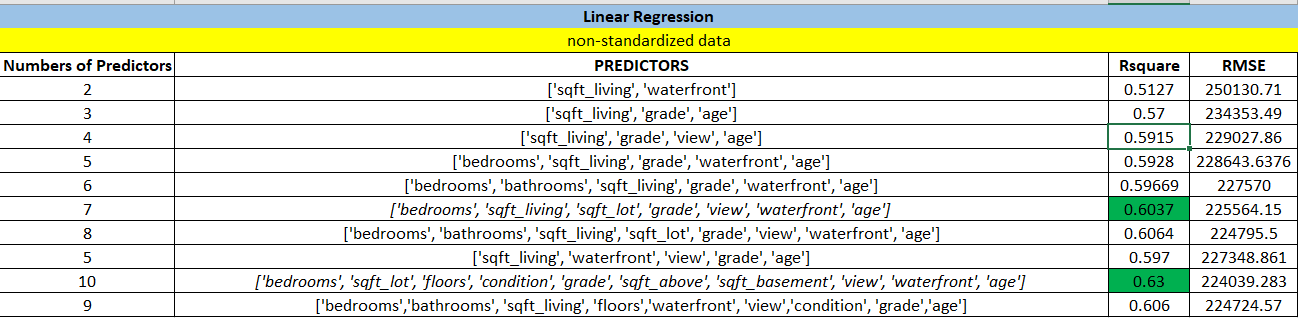

##### After the Standardizing the numerical veriable we run the same model for above combinations to check whether we are getting any improvements in the Rscore, it is observed that there is no significant change in the Rscore and RMSE, we cross validated the both model methods with the Forward/Backward propogation method, the results are the same to encounter this we did one-hot encoding for the categorical veriable to check where there is any significant performance improvement

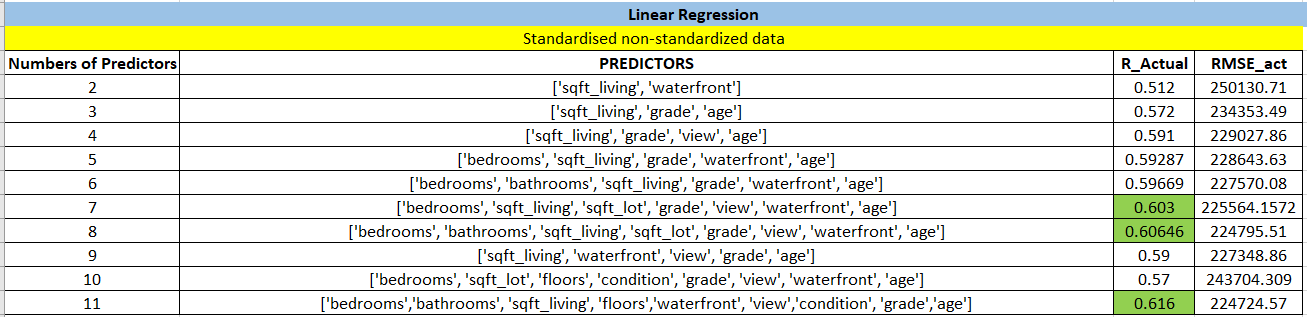

### 2. KNN Regression Model

**Warning : Donot execute this code, it carries out execution with all combinations of the 13 columns i.e. 8191 combos.**

**BEWARE!! Execution Time - 10.5 hrs**

In [ ]:
columns = list(x.columns.values)
r_squared = []
cols = []
k = []
rmse = []
for i in [5,10]:
    n = i
    for i in range(len(columns)):
        comb = list(combinations(columns,i+1))
        for i in comb:
            print(n,'-',i)
            i = list(i)
            x_train = x_std[i]
            model = KNeighborsRegressor(n_neighbors=n)
            model.fit(x_train,y)
            x_test_ = x_test[i]
            y_pred = model.predict(x_test_)
            #y_pred = cross_val_predict(model, x_test_, y_test, cv = 10)
            r_squared.append(r2_score(y_test, y_pred))
            cols.append(i)
            k.append(n)
            rmse.append(sqrt(mean_squared_error(y_test,y_pred)))

### Feature Engineering

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

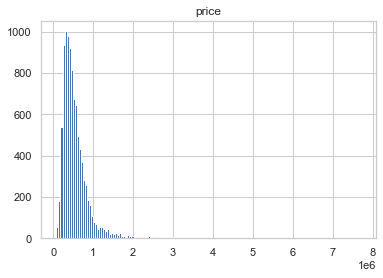

In [37]:
#Distribution of price.
house.hist(column='price',bins=150)

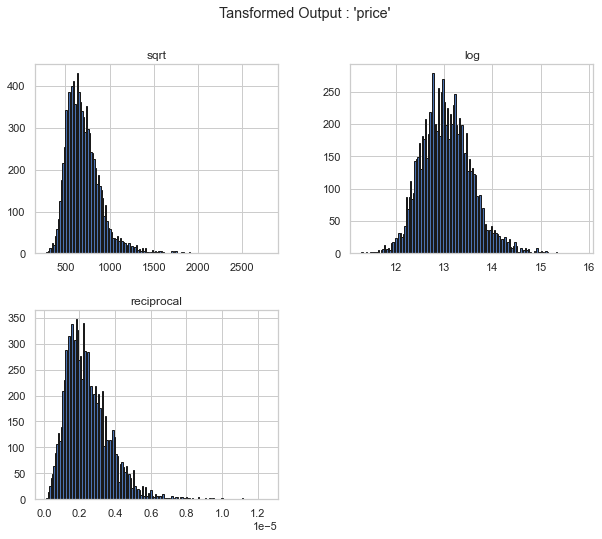

In [38]:
#Distribution of price after applying transformations.
house_price_tr = house["price"].transform([np.sqrt,np.log,np.reciprocal])
house_price_tr.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'price'")
plt.show()

array([[<AxesSubplot:title={'center':'sqft_living'}>]], dtype=object)

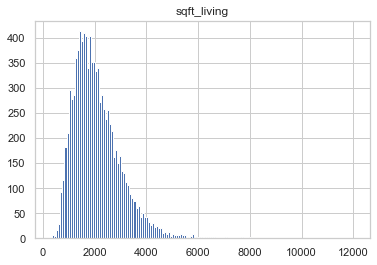

In [39]:
#Distribution of sqft_living.
house.hist(column='sqft_living',bins=150)

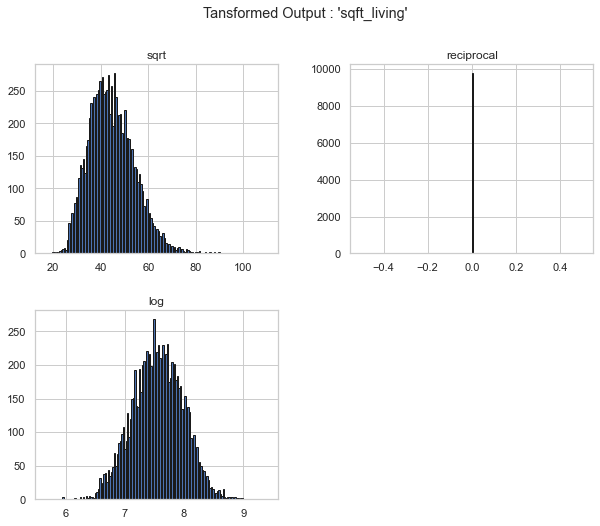

In [40]:
#Distribution of sqft_living after applying transformations.
house_living_tr = house["sqft_living"].transform([np.sqrt,np.reciprocal,np.log])
house_living_tr.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'sqft_living'")
plt.show()

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

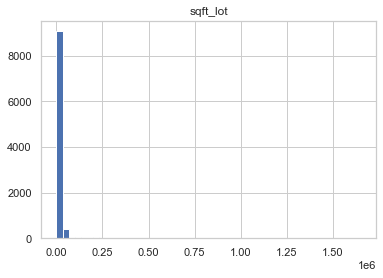

In [41]:
#Distribution of sqft_lot.
house.hist(column='sqft_lot',bins=50)

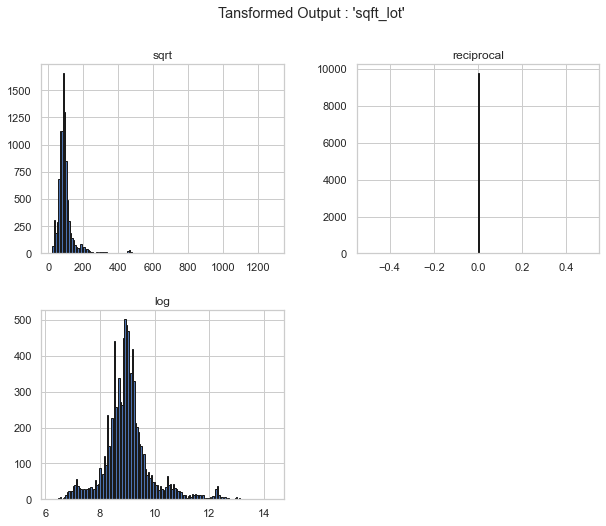

In [42]:
#Distribution of sqft lot after transformations.
house_lot_tr = house["sqft_lot"].transform([np.sqrt,np.reciprocal,np.log])
house_lot_tr.hist(bins=150, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'sqft_lot'")
plt.show()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

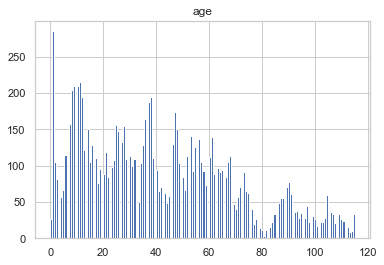

In [43]:
#Distribution of age.
house.hist(column='age',bins=150)

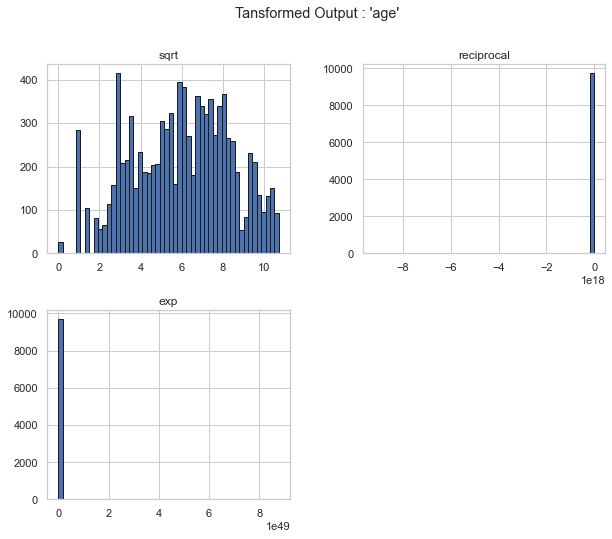

In [44]:
#Distribution of age after applying tranformations.
house_age_tr = house["age"].transform([np.sqrt,np.reciprocal,np.exp])
house_age_tr.hist(bins=50, layout= (2,2), edgecolor = "k", figsize = (10,8))
plt.suptitle("Tansformed Output : 'age'")
plt.show()

In [45]:
#Applying selected tranformations to variables.
house_tr = house
house_tr["price"] = np.log(house["price"])
house_tr["sqft_living"] = np.log(house["sqft_living"])
house_tr["sqft_lot"] = np.log(house["sqft_lot"])
house_tr["age"] = np.sqrt(house["age"])
house_tr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,98136,7.071068
1,14.018451,4,4.50,8.597851,11.532042,1.0,0,0,3,11,98053,3.741657
2,13.056224,2,1.00,7.056175,8.699515,1.0,0,0,4,7,98115,8.544004
3,12.644328,3,1.00,7.265430,9.898525,1.5,0,0,4,7,98028,9.380832
4,12.899220,3,1.75,7.222566,9.177817,1.0,0,0,4,7,98074,6.164414
...,...,...,...,...,...,...,...,...,...,...,...,...
9756,12.969212,3,2.00,7.306531,7.026427,3.0,0,0,3,8,98144,1.000000
9757,13.322337,4,2.50,7.832014,8.703341,2.0,0,0,3,9,98056,1.000000
9758,13.822983,4,3.50,8.163371,8.881836,2.0,0,0,3,9,98136,2.449490
9759,12.904459,2,0.75,6.927558,7.207860,2.0,0,0,3,7,98144,2.449490


In [46]:
house_tr_test = house_test
house_tr_test["price"] = np.log(house_test["price"])
house_tr_test["sqft_living"] = np.log(house_test["sqft_living"])
house_tr_test["sqft_lot"] = np.log(house_test["sqft_lot"])
house_tr_test["age"] = np.sqrt(house_test["age"])
house_tr_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,age
0,12.685408,3,2.50,7.544332,8.788746,2.0,0,0,3,7,98038,3.464102
1,13.180632,5,2.00,7.501082,8.486734,1.5,0,0,3,7,98107,10.723805
2,12.149502,2,1.00,7.090077,9.195227,1.0,0,0,4,7,98002,9.695360
3,13.440817,4,1.75,7.753624,8.517193,1.5,0,0,4,7,98117,9.273618
4,12.388394,4,1.00,7.106606,8.996528,1.0,0,0,2,7,98001,6.782330
...,...,...,...,...,...,...,...,...,...,...,...,...
2212,12.911642,4,2.50,7.590852,8.521185,2.0,0,0,3,7,98056,2.828427
2213,12.868761,3,2.50,7.695303,8.735847,2.0,0,2,3,8,98198,2.236068
2214,13.318752,4,3.50,7.955074,8.626406,2.0,0,0,3,8,98056,1.000000
2215,12.345835,3,1.75,7.038784,7.090910,2.0,0,0,3,8,98108,1.000000


In [47]:
#One hot coding for categorical variable zipcode.
house_tr_dummies = pd.get_dummies(house_tr, columns = ["zipcode"],drop_first=True)
house_tr_dummies

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,13.311329,4,3.00,7.580700,8.517193,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
1,14.018451,4,4.50,8.597851,11.532042,1.0,0,0,3,11,...,0,0,0,0,0,0,0,0,0,0
2,13.056224,2,1.00,7.056175,8.699515,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,12.644328,3,1.00,7.265430,9.898525,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,12.899220,3,1.75,7.222566,9.177817,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,12.969212,3,2.00,7.306531,7.026427,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
9757,13.322337,4,2.50,7.832014,8.703341,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
9758,13.822983,4,3.50,8.163371,8.881836,2.0,0,0,3,9,...,0,0,0,0,0,0,0,0,0,0
9759,12.904459,2,0.75,6.927558,7.207860,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0


In [48]:
house_tr_dummies_test = pd.get_dummies(house_tr_test, columns = ["zipcode"],drop_first=True)
house_tr_dummies_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.685408,3,2.50,7.544332,8.788746,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,13.180632,5,2.00,7.501082,8.486734,1.5,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,12.149502,2,1.00,7.090077,9.195227,1.0,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
3,13.440817,4,1.75,7.753624,8.517193,1.5,0,0,4,7,...,0,0,0,0,0,0,0,0,0,0
4,12.388394,4,1.00,7.106606,8.996528,1.0,0,0,2,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,12.911642,4,2.50,7.590852,8.521185,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2213,12.868761,3,2.50,7.695303,8.735847,2.0,0,2,3,8,...,0,0,0,0,0,0,0,0,1,0
2214,13.318752,4,3.50,7.955074,8.626406,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2215,12.345835,3,1.75,7.038784,7.090910,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Target and Predictors.
x_tr = house_tr_dummies.drop(columns = ['price'])
y_tr = house_tr_dummies[['price']]
x_tr_test = house_tr_dummies_test.drop(columns = ['price'])
y_tr_test = house_tr_dummies_test[['price']]

### Linear regression on transformed data using one-hot coding method

In [50]:
x_tr.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'age', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcod

In [51]:
#set of combinations of predcitors
Predictor_List = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'age',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']
#declaring the veriable for fitting Linear Model
x1 = x_tr[Predictor_List]
x_test1 = x_tr_test[Predictor_List]
# fitting model
regr = linear_model.LinearRegression(normalize=True, fit_intercept=True)  # fitting model
regr.fit(x1, y_tr)
#cross val linear regression predictor with 10k fold
CVYpred = cross_val_predict(regr, x_test1, y_tr_test, cv=10)
#calculating the Rsquare and RMSE value for the fitted model
R2 = r2_score(y_tr_test, CVYpred)
RMSE2 = sqrt(mean_squared_error(y_tr_test, CVYpred))
print("R2: ",R2)
print("RMSE:",RMSE2)

R2:  0.8646705779111964
RMSE: 0.1945301949025099


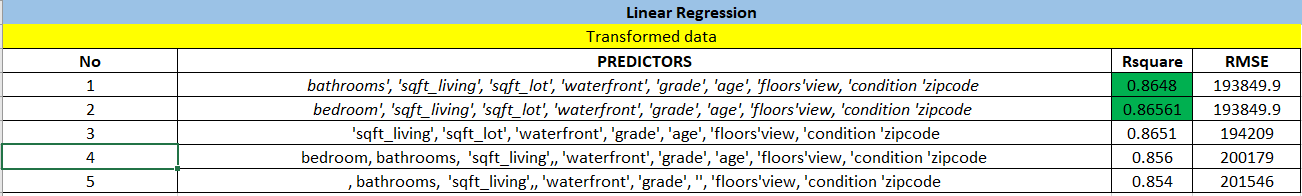

from above table it is observed that the transformation of the appropriate variable (zipcode) seems to be improving the linear regression model accuracy with the maximum Rsquare as 0.865

# Model Selection

## Forward selection

### Linear Regression

#### Using data without standardization and without transformations

In [52]:
sfs_f = SFS(LinearRegression(), k_features = (1,11), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x,y) #forward selection for linear regresion for non standardized data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    2.8s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    2.9s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.0s finished

[2021-07-12 00:29:49] Features: 1/11 -- score: 0.48976773002985896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 00:29:49] Features: 2/11 -- score: 0.532313482833206[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done

In [53]:
#pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

In [54]:
#maximum r_square value.
sfs_f.k_score_

0.6348224354905966

In [55]:
#combination of variables which got max. r_square value.
sfs_f.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'age')

#### Using standardized data

In [56]:
sfs_f = SFS(LinearRegression(), k_features = (1,11), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x_std,y) # forward selection method -  linear regression using standardized data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-07-12 00:30:00] Features: 1/11 -- score: 0.48976773002985896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 00:30:01] Features: 2/11 -- score: 0.532313482833206[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done

In [57]:
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.495906839857827, 0.5196142161373629, 0.4262...",0.489768,"(sqft_living,)",0.0251945,0.0339223,0.0113074
2,"(0, 7)","[0.5493819443385, 0.5644418873866408, 0.465174...",0.532313,"(sqft_living, view)",0.0289938,0.0390377,0.0130126
3,"(0, 7, 9)","[0.5601118291651885, 0.598246027711575, 0.5195...",0.567172,"(sqft_living, view, grade)",0.0252524,0.0340002,0.0113334
4,"(0, 2, 7, 9)","[0.597104594708834, 0.6395422112191393, 0.5832...",0.606673,"(sqft_living, age, view, grade)",0.0229801,0.0309407,0.0103136
5,"(0, 2, 6, 7, 9)","[0.6158991775813824, 0.6793255827779787, 0.602...",0.626007,"(sqft_living, age, waterfront, view, grade)",0.0264472,0.0356089,0.0118696
6,"(0, 2, 3, 6, 7, 9)","[0.6221547633707573, 0.6867903205859782, 0.595...",0.629662,"(sqft_living, age, bedrooms, waterfront, view,...",0.0268042,0.0360896,0.0120299
7,"(0, 2, 3, 4, 6, 7, 9)","[0.6243001879732808, 0.6899634814540776, 0.590...",0.633364,"(sqft_living, age, bedrooms, bathrooms, waterf...",0.0274716,0.0369882,0.0123294
8,"(0, 1, 2, 3, 4, 6, 7, 9)","[0.6204594061038957, 0.6915908865660292, 0.590...",0.633931,"(sqft_living, sqft_lot, age, bedrooms, bathroo...",0.0276351,0.0372084,0.0124028
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.6207741639063135, 0.6915735091275995, 0.592...",0.634339,"(sqft_living, sqft_lot, age, bedrooms, bathroo...",0.0277649,0.0373831,0.012461
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.619960870330533, 0.6924786191828101, 0.5934...",0.634822,"(sqft_living, sqft_lot, age, bedrooms, bathroo...",0.028066,0.0377885,0.0125962


In [58]:
sfs_f.k_score_

0.6348224354905891

In [59]:
sfs_f.k_feature_names_

('sqft_living',
 'sqft_lot',
 'age',
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade')

#### Using transformed data

In [60]:
x_tr.shape

(9760, 79)

In [61]:
sfs_f = SFS(LinearRegression(), k_features = (1,79), forward = True, floating = True, verbose = 2, scoring = "r2",
          cv = 10, n_jobs = -1).fit(x_tr,y_tr) # forward selection method -  linear regression using one hotcoding dummy standardization

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    0.7s finished

[2021-07-12 00:30:18] Features: 1/79 -- score: 0.49833677817426186[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  63 out of  78 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 00:30:19] Features: 2/79 -- score: 0.5501991677849379[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  62 out of  77 | elapsed:    0.6s remaining:    0.1s
[P

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished

[2021-07-12 00:30:38] Features: 16/79 -- score: 0.725492471092067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2021-07-12 00:30:40] Features: 17/79 -- score: 0.732692851752444[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent wor

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished

[2021-07-12 00:31:43] Features: 31/79 -- score: 0.8102436855838153[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    1.6s finished

[2021-07-12 00:31:48] Features: 32/79 -- score: 0.8138288107009345[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    1.8s finished

[2021-07-12 00:31:52] Features: 33/79 -- score: 0.8173604428950376[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.2s finished

[2021-07-12 00:33:45] Features: 50/79 -- score: 0.8588570431005103[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished

[2021-07-12 00:33:52] Features: 51/79 -- score: 0.8605676704569687[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.4s remaining: 

[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    7.6s finished

[2021-07-12 00:36:06] Features: 67/79 -- score: 0.8743773374898746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.8s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    7.8s finished

[2021-07-12 00:36:16] Features: 68/79 -- score: 0.8748651439620465[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    8.0s finished

[2021-07-12 00:39:28] Features: 69/79 -- score: 0.8783798727685486[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.

[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    9.5s finished

[2021-07-12 00:42:29] Features: 75/79 -- score: 0.8790213212559749[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   10.4s finished

[2021-07-12 00:42:40] Features: 76/79 -- score: 0.8790095196523826[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:    9.8s finished

[

In [62]:
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.4547916315164421, 0.5105124827589763, 0.451...",0.498337,"(grade,)",0.0268075,0.036094,0.0120313
2,"(2, 8)","[0.5251415294616122, 0.5638232642676171, 0.504...",0.550199,"(sqft_living, grade)",0.0270415,0.0364091,0.0121364
3,"(2, 8, 9)","[0.5696990365077922, 0.6123480794792421, 0.547...",0.583929,"(sqft_living, grade, age)",0.0180449,0.0242959,0.00809864
4,"(2, 8, 9, 22)","[0.596016679444749, 0.6275135617031062, 0.5687...",0.607429,"(sqft_living, grade, age, zipcode_98023)",0.017281,0.0232674,0.0077558
5,"(2, 8, 9, 12, 22)","[0.61971871666826, 0.6446874399111675, 0.58875...",0.623966,"(sqft_living, grade, age, zipcode_98004, zipco...",0.0177092,0.0238439,0.00794798
...,...,...,...,...,...,...,...
75,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[0.8824823405510765, 0.8840881007756333, 0.874...",0.879021,"(bedrooms, bathrooms, sqft_living, sqft_lot, w...",0.00475722,0.00640519,0.00213506
76,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[0.8823027951434195, 0.8840085837319218, 0.874...",0.87901,"(bedrooms, bathrooms, sqft_living, sqft_lot, w...",0.00472529,0.00636221,0.00212074
77,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8821866374864896, 0.8839862384753532, 0.874...",0.878992,"(bedrooms, bathrooms, sqft_living, sqft_lot, w...",0.00471226,0.00634466,0.00211489
78,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.882212023585093, 0.8840045272279009, 0.8741...",0.878951,"(bedrooms, bathrooms, sqft_living, sqft_lot, w...",0.00469184,0.00631716,0.00210572


In [63]:
sfs_f.k_score_

0.8790213212559749

In [64]:
sfs_f.k_feature_names_

('bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'age',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipc

### KNN

#### Using data without standardization and without transformations

In [65]:
sfs_f = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,11), forward = True, floating = True, 
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x,y) #forward selection for linear regresion for non standardized data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    2.5s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.0s finished

[2021-07-12 09:07:07] Features: 1/11 -- score: 0.5062936327249064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 09:07:08] Features: 2/11 -- score: 0.5404699133586343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done

In [66]:
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.5262804417759158, 0.537774315190295, 0.4045...",0.506294,"(sqft_living,)",0.0299635,0.0403433,0.0134478
2,"(2, 9)","[0.5507737729500284, 0.5721566614263205, 0.456...",0.54047,"(sqft_living, zipcode)",0.0267269,0.0359854,0.0119951
3,"(2, 9, 10)","[0.563311764777392, 0.5784460829965432, 0.4779...",0.548544,"(sqft_living, zipcode, age)",0.0233386,0.0314235,0.0104745
4,"(2, 8, 9, 10)","[0.5643478320910941, 0.5785468569265879, 0.478...",0.548808,"(sqft_living, grade, zipcode, age)",0.0233471,0.0314348,0.0104783
5,"(2, 6, 8, 9, 10)","[0.5643705833257886, 0.5785483831016381, 0.478...",0.548871,"(sqft_living, view, grade, zipcode, age)",0.0234243,0.0315388,0.0105129
6,"(2, 4, 6, 8, 9, 10)","[0.5641976547001185, 0.5785623106210949, 0.478...",0.548897,"(sqft_living, floors, view, grade, zipcode, age)",0.023417,0.031529,0.0105097
7,"(1, 2, 4, 6, 8, 9, 10)","[0.5644340949288715, 0.5785536089768846, 0.477...",0.548927,"(bathrooms, sqft_living, floors, view, grade, ...",0.0234403,0.0315604,0.0105201
8,"(1, 2, 4, 5, 6, 8, 9, 10)","[0.5644340949288715, 0.5785536089768846, 0.477...",0.548925,"(bathrooms, sqft_living, floors, waterfront, v...",0.0234408,0.031561,0.0105203
9,"(1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.5645033325374607, 0.5785807329024579, 0.477...",0.548829,"(bathrooms, sqft_living, floors, waterfront, v...",0.0235287,0.0316794,0.0105598
10,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.5646353339313903, 0.578595547478072, 0.4772...",0.548754,"(bedrooms, bathrooms, sqft_living, floors, wat...",0.0235158,0.031662,0.010554


In [67]:
sfs_f.k_score_

0.5489272744130798

In [68]:
sfs_f.k_feature_names_

('bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'zipcode', 'age')

#### Using standardized data

In [69]:
sfs_f = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,11), forward = True, floating = True, 
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_std,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    2.5s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    3.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.9s finished

[2021-07-12 09:12:35] Features: 1/11 -- score: 0.5065145634512612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 09:12:36] Features: 2/11 -- score: 0.6996232639536044[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done

In [70]:
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.5294812128915776, 0.5358495293840444, 0.404...",0.506515,"(sqft_living,)",0.0301788,0.0406332,0.0135444
2,"(0, 10)","[0.6952880055308022, 0.6651194360044581, 0.731...",0.699623,"(sqft_living, zipcode)",0.0412049,0.0554789,0.018493
3,"(0, 9, 10)","[0.7156455527302562, 0.6919471116788785, 0.750...",0.727853,"(sqft_living, grade, zipcode)",0.0322374,0.0434049,0.0144683
4,"(0, 7, 9, 10)","[0.7154915206292484, 0.6943976915881678, 0.787...",0.732251,"(sqft_living, view, grade, zipcode)",0.0342626,0.0461317,0.0153772
5,"(0, 6, 7, 9, 10)","[0.7160036354597556, 0.6935192925170724, 0.789...",0.733465,"(sqft_living, waterfront, view, grade, zipcode)",0.0348157,0.0468764,0.0156255
6,"(0, 1, 6, 7, 9, 10)","[0.7132605571171464, 0.6950689898160766, 0.785...",0.733495,"(sqft_living, sqft_lot, waterfront, view, grad...",0.0357615,0.0481498,0.0160499
7,"(0, 1, 5, 6, 7, 9, 10)","[0.7091581331511885, 0.6968681838108426, 0.785...",0.732165,"(sqft_living, sqft_lot, floors, waterfront, vi...",0.0364607,0.0490912,0.0163637
8,"(0, 1, 4, 5, 6, 7, 9, 10)","[0.7122113101660119, 0.6983439615706847, 0.778...",0.72973,"(sqft_living, sqft_lot, bathrooms, floors, wat...",0.0369709,0.0497782,0.0165927
9,"(0, 1, 4, 5, 6, 7, 8, 9, 10)","[0.703583214560837, 0.6977581311974836, 0.7772...",0.724991,"(sqft_living, sqft_lot, bathrooms, floors, wat...",0.0366671,0.0493691,0.0164564
10,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10)","[0.6982447240677478, 0.689607333231306, 0.7662...",0.719844,"(sqft_living, sqft_lot, age, bathrooms, floors...",0.0363323,0.0489184,0.0163061


In [71]:
sfs_f.k_score_

0.7334953010833344

In [72]:
sfs_f.k_feature_names_

('sqft_living', 'sqft_lot', 'waterfront', 'view', 'grade', 'zipcode')

#### Using transformed data

In [74]:
sfs_f = SFS(KNeighborsRegressor(n_neighbors = 20), k_features = (1,79), forward = True, floating = True, 
            verbose = 2, scoring = "r2", cv = 10, n_jobs = -1).fit(x_tr,y_tr) #forward selection for linear regresion for transformed  standardized data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:   23.9s finished

[2021-07-12 09:59:49] Features: 1/79 -- score: 0.46635007004867723[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-07-12 09:59:59] Features: 2/79 -- score: 0.5539028569539824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    3.5s finished

[2021-07-12 10:02:47] Features: 17/79 -- score: 0.7107822128965686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    3.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    3.9s finished

[2021-07-12 10:03:05] Features: 18/79 -- score: 0.7140285188403115[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.2s remaining: 

[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   18.2s finished

[2021-07-12 10:11:25] Features: 33/79 -- score: 0.7788381419654007[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   23.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   17.8s finished

[2021-07-12 10:12:06] Features: 34/79 -- score: 0.7810619245237318[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   37.8s finished

[2021-07-12 10:27:46] Features: 52/79 -- score: 0.8044106690671681[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:   44.1s finished

[2021-07-12 10:28:53] Features: 53/79 -- score: 0.8050374661169439[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   42.3s finished

[2021-07-12 10:29:58

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:   57.5s finished

[2021-07-12 10:45:35] Features: 69/79 -- score: 0.8207240306330356[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    7.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:   58.7s finished

[2021-07-12 10:46:45] Features: 70/79 -- score: 0.8210805576149882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

In [75]:
pd.DataFrame.from_dict(sfs_f.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.4372393634952011, 0.4368980181725417, 0.435...",0.46635,"(grade,)",0.0404376,0.0544458,0.0181486
2,"(8, 9)","[0.522163378341386, 0.5901712404046862, 0.5332...",0.553903,"(grade, age)",0.0150268,0.0202323,0.00674412
3,"(2, 8, 9)","[0.6046996962385449, 0.6654546970188836, 0.613...",0.621242,"(sqft_living, grade, age)",0.0170775,0.0229935,0.00766449
4,"(2, 8, 9, 22)","[0.6133540046598593, 0.6769266644892814, 0.624...",0.634636,"(sqft_living, grade, age, zipcode_98023)",0.018449,0.02484,0.00828
5,"(2, 8, 9, 12, 22)","[0.6332605976486276, 0.6914123170582489, 0.636...",0.646382,"(sqft_living, grade, age, zipcode_98004, zipco...",0.0197299,0.0265646,0.00885487
...,...,...,...,...,...,...,...
75,"(1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...","[0.8219416401796368, 0.8244928886691536, 0.805...",0.814562,"(bathrooms, sqft_living, sqft_lot, waterfront,...",0.00573487,0.00772152,0.00257384
76,"(1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...","[0.813581398679615, 0.8203578218563395, 0.7979...",0.806974,"(bathrooms, sqft_living, sqft_lot, floors, wat...",0.00668007,0.00899415,0.00299805
77,"(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...","[0.8043333356731034, 0.8144757553377383, 0.784...",0.795452,"(bathrooms, sqft_living, sqft_lot, floors, wat...",0.00850907,0.0114567,0.00381892
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...","[0.7844481728661578, 0.7951923133798988, 0.764...",0.777289,"(bedrooms, bathrooms, sqft_living, sqft_lot, f...",0.00974229,0.0131172,0.00437239


In [76]:
sfs_f.k_score_

0.822012907975969

In [77]:
sfs_f.k_feature_names_

('sqft_living',
 'sqft_lot',
 'waterfront',
 'view',
 'grade',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 

### Decision Tree on transformed data using one-hot coding method

In [78]:
Predictor_List = ['sqft_living', 'sqft_lot', 'waterfront', 'grade', 'age', 'floors','view', 'condition',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146',
       'zipcode_98148', 'zipcode_98155', 'zipcode_98166', 'zipcode_98168',
       'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
       'zipcode_98199']

In [79]:
#x_train,x_test,y_train,y_test = train_test_split(x_std,y,size=0.2)
# decission tree regressor
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
model.fit(x_tr,y) #fitting the model
#CVYpred = cross_val_predict(model, x_test,y_test)
y_pred = model.predict(x_tr_test) #Y_pred on test data
R2_1 = r2_score(y_test, y_pred) #calculating Rsquare
print(R2_1)
RMSE2 = sqrt(mean_squared_error(y_test, y_pred)) #calculating RMSE for the model
print(RMSE2)
# Plot Decission Tree
#plt.figure(figsize=(15,15))
#tree.plot_tree(model, filled=True,feature_names=x_train.columns)

0.6386998134876138
215392.75886994207


[Text(231.86006610576922, 207.55636363636364, 'grade <= 8.5\nmse = 144040259007.457\nsamples = 9760\nvalue = 542724.986'),
 Text(162.5627704326923, 187.7890909090909, 'sqft_living <= 7.657\nmse = 39075674691.221\nsamples = 7812\nvalue = 436165.61'),
 Text(101.25486778846154, 168.0218181818182, 'grade <= 7.5\nmse = 24143039011.193\nsamples = 5606\nvalue = 385875.958'),
 Text(55.63233173076923, 148.25454545454545, 'age <= 9.247\nmse = 20242153114.293\nsamples = 4326\nvalue = 359165.592'),
 Text(28.838942307692307, 128.48727272727274, 'grade <= 6.5\nmse = 17000567406.363\nsamples = 3620\nvalue = 341175.257'),
 Text(16.632692307692306, 108.72, 'zipcode_98033 <= 0.5\nmse = 11827357905.617\nsamples = 735\nvalue = 269549.541'),
 Text(12.340384615384615, 88.95272727272729, 'sqft_living <= 7.473\nmse = 10661572172.184\nsamples = 725\nvalue = 266118.501'),
 Text(6.975, 69.18545454545455, 'zipcode_98115 <= 0.5\nmse = 9310697820.469\nsamples = 682\nvalue = 259975.169'),
 Text(4.292307692307692, 49

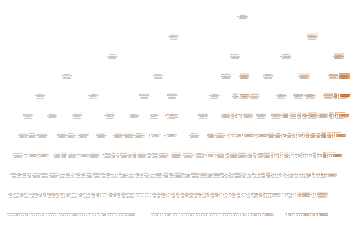

In [80]:
tree.plot_tree(model, filled = True, feature_names = x_tr_test.columns)

##### Running the above model with Combinatorics we came accross the below best possible combinations from which two combinations were giving best R square score for the Decision tree regression as highlighted below 

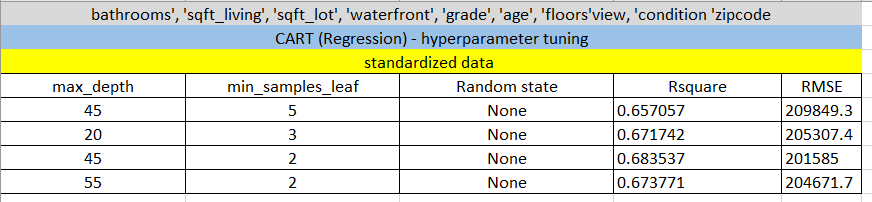

##### After the Standardizing the numerical veriable we run the same model for above combinations to check whether we are getting any improvements in the Rscore, it is observed that there is no significant change in the Rscore and RMSE, we cross validated the both model methods with the Forward/Backward propogation method, the results are the same to encounter this we did one-hot encoding for the categorical veriable to check where there is any significant performance improvement

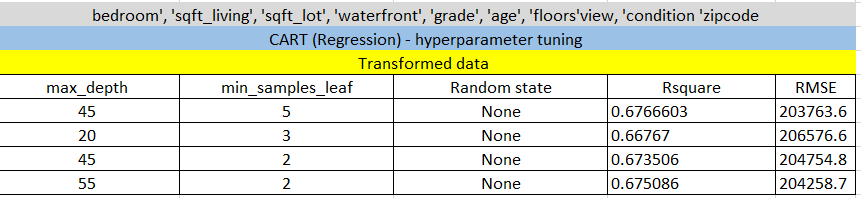

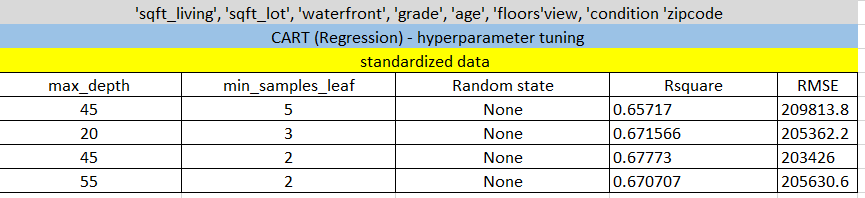

#### from above table it is observed that the transformation of the appropriate variable (zipcode) not factor in any to improvement to the  model accuracy  & maximum observed Rsquare is 0.683